# **Importing Data Set**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


# **Tools & Libraries**

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning / clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# **Data Loading**

In [4]:
file_path = f"{path}/Mall_Customers.csv"
df = pd.read_csv(file_path)

# **Data Exploration (EDA)**

In [7]:
# Shape of the dataset (rows, columns)
print("Shape:", df.shape)

# Preview first few rows
print(df.head())

# Column types and non-null counts
print(df.info())

# Check for missing values
print(df.isna().sum())

# Quick stats (mean, std, min, max) for numeric columns
print(df.describe())


Shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender 

In [8]:
print(df['Gender'].value_counts())   # how many males/females
print(df[['Age','Annual Income (k$)','Spending Score (1-100)']].describe())


Gender
Female    112
Male       88
Name: count, dtype: int64
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


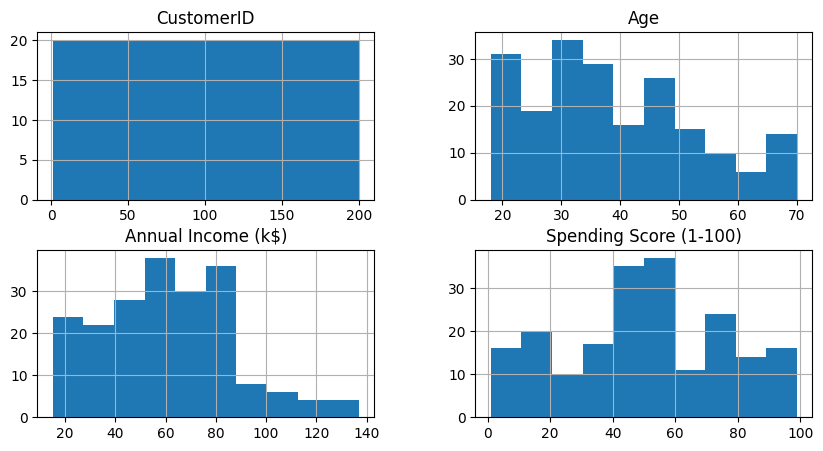

In [9]:
df.hist(figsize=(10,5))
plt.show()


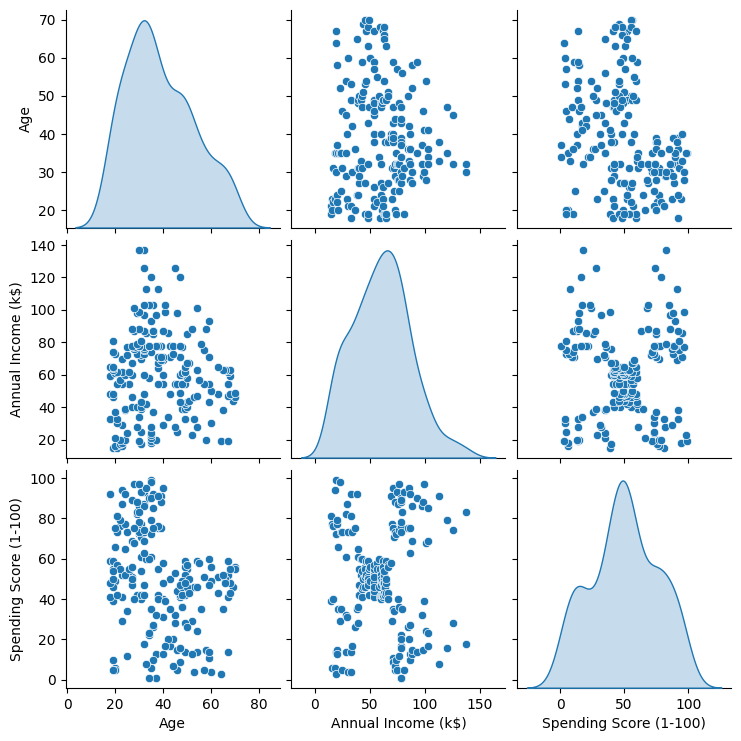

In [12]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']], diag_kind='kde')
plt.show()


# **Scatterplot (Income vs Spending)**
# showed natural groupings.

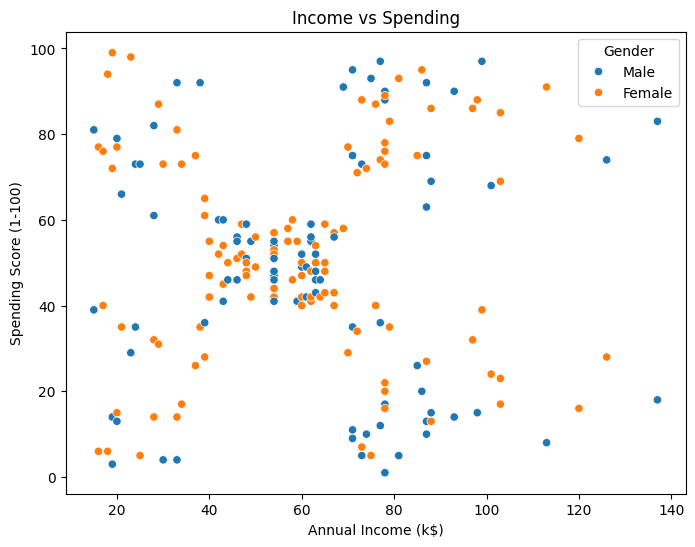

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title("Income vs Spending")
plt.show()


# **Feature Selection & Preprocessing**

In [14]:
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Choosing Number of Clusters (K)**

# **Elbow Methodcurve**
# flattened at K=5.


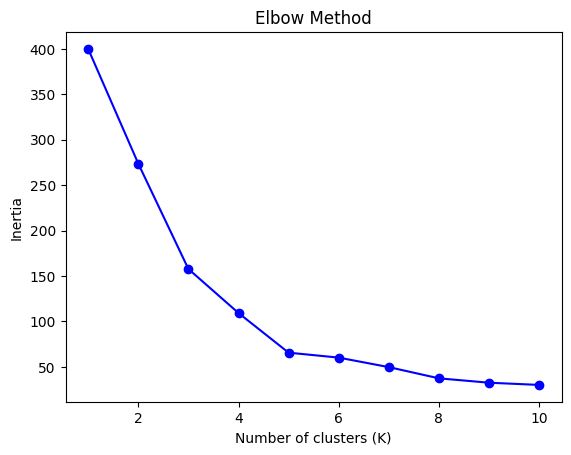

In [15]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


# Silhouette Score

In [16]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, silhouette score={score:.3f}")


K=2, silhouette score=0.397
K=3, silhouette score=0.467
K=4, silhouette score=0.494
K=5, silhouette score=0.555
K=6, silhouette score=0.514
K=7, silhouette score=0.502
K=8, silhouette score=0.455
K=9, silhouette score=0.457
K=10, silhouette score=0.445


# **Modeling (K-Means)**

In [17]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View cluster assignments
print(df.head())

# Cluster centers (scaled back to original space if needed)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster centers (Income, Spending):\n", centers)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
Cluster centers (Income, Spending):
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


# **Visualization**

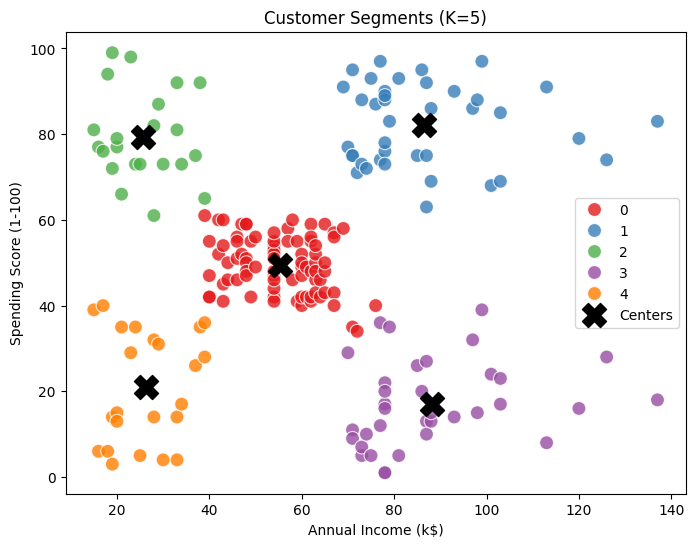

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100,
    alpha=0.8
)

# Plot cluster centers
plt.scatter(
    centers[:,0], centers[:,1],
    c='black', s=300, marker='X', label='Centers'
)

plt.title("Customer Segments (K=5)")
plt.legend()
plt.show()


Cluster 0 (Orange) → Low income, low spending (Budget Customers).

Cluster 1 (Green) → Low income, high spending (Value Shoppers).

Cluster 2 (Red) → Mid income, mid spending (Average Customers).

Cluster 3 (Purple) → High income, low spending (Careful Spenders).

Cluster 4 (Blue) → High income, high spending (Luxury Shoppers).

# **Bonus : Analyzing average spending per cluster**

In [19]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


# **Bouns : Trying different clustering algorithms (e.g., DBSCAN)**

DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


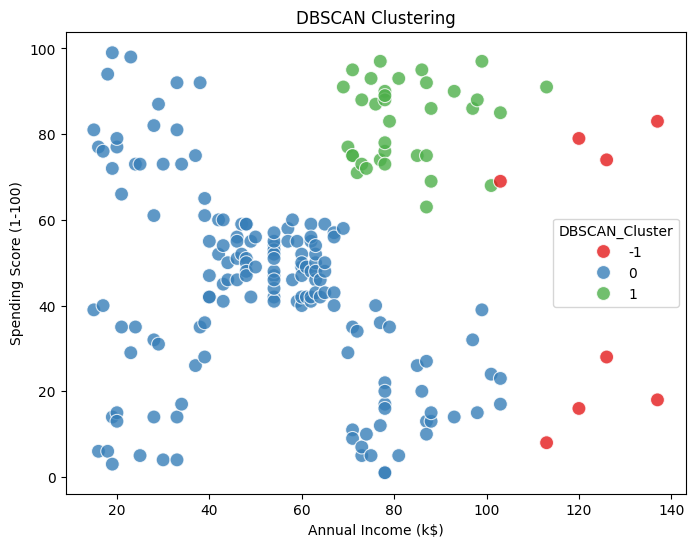

In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = labels
print(df['DBSCAN_Cluster'].value_counts())

# Visualize
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    palette='Set1',
    data=df,
    s=100,
    alpha=0.8
)
plt.title("DBSCAN Clustering")
plt.show()


# **Gender Analysis (Post-Clustering)**

/tmp/ipython-input-3919627193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette="Set2")


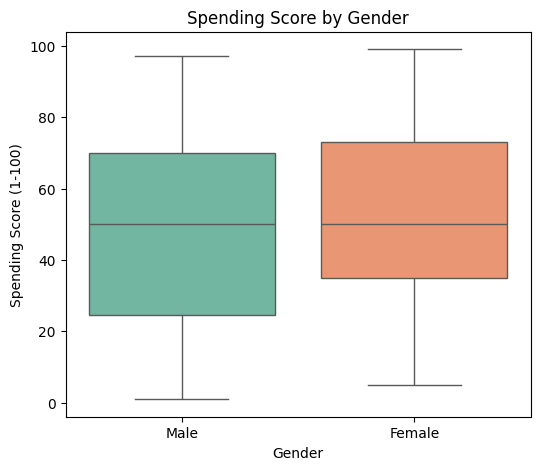

In [21]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette="Set2")
plt.title("Spending Score by Gender")
plt.show()


In [22]:
print(df.groupby("Gender")["Spending Score (1-100)"].mean())


Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


In [25]:
df.groupby('Cluster')['Gender'].value_counts(normalize=True)


Cluster  Gender
0        Female    0.592593
         Male      0.407407
1        Female    0.538462
         Male      0.461538
2        Female    0.590909
         Male      0.409091
3        Male      0.542857
         Female    0.457143
4        Female    0.608696
         Male      0.391304
Name: proportion, dtype: float64

In [26]:
# Count of males/females in each cluster
print(df.groupby('Cluster')['Gender'].value_counts())

# Percentage distribution
print(df.groupby('Cluster')['Gender'].value_counts(normalize=True).round(2))


Cluster  Gender
0        Female    48
         Male      33
1        Female    21
         Male      18
2        Female    13
         Male       9
3        Male      19
         Female    16
4        Female    14
         Male       9
Name: count, dtype: int64
Cluster  Gender
0        Female    0.59
         Male      0.41
1        Female    0.54
         Male      0.46
2        Female    0.59
         Male      0.41
3        Male      0.54
         Female    0.46
4        Female    0.61
         Male      0.39
Name: proportion, dtype: float64


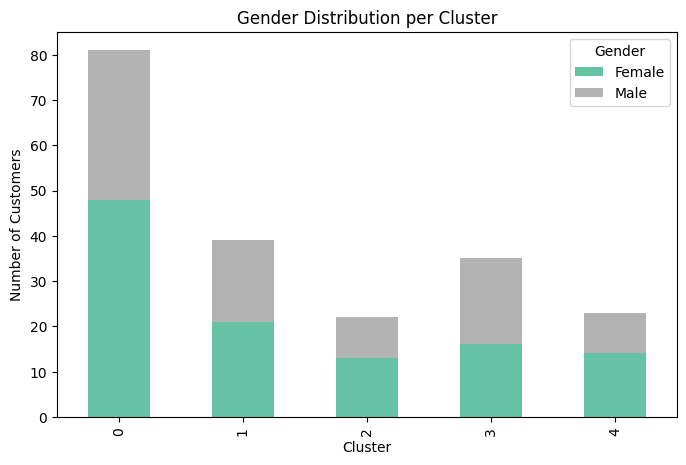

In [27]:
cluster_gender = df.groupby(['Cluster','Gender']).size().unstack()

cluster_gender.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    colormap='Set2'
)

plt.title("Gender Distribution per Cluster")
plt.ylabel("Number of Customers")
plt.show()


# **Final Conclusion**

Using K-Means clustering, we segmented mall customers into five distinct groups based on Annual Income and Spending Score. These clusters represent clear customer profiles:

**Budget Customers (low income, low spending)**

**Value Shoppers (low income, high spending)**

**Average Customers (mid income, mid spending)**

**Careful Spenders (high income, low spending)**

**Luxury Shoppers (high income, high spending)**

The segmentation is business actionable, as each cluster supports targeted marketing strategies, personalized promotions, and better product positioning.

Additionally, analyzing gender distribution per cluster revealed important demographic insights. For example, Cluster 0 (Budget Customers) is the largest and contains a fairly balanced mix of males and females, while other clusters show different proportions of gender. These differences help businesses tailor their strategies not only by income and spending behavior but also by customer demographics.

Finally, we compared with **DBSCAN**, but results were less meaningful, confirming that **K-Means** is the most effective algorithm for this dataset. Overall, the project demonstrates how clustering can transform raw customer data into strategic insights that drive customer engagement and business growth.